In [2]:
import polars as pl
import importlib
import numpy as np
import lyss
importlib.reload(lyss)
from lyss import get_keywords_cooccurrences
from itertools import combinations
import os
def df(name: str) -> str:
    return os.path.join("dataframes", name + ".parquet") 
bim_dataset_path = "bim_dataset.xlsx"

## Papers

In [10]:
def get_papers() -> pl.DataFrame:
    papers = pl.read_excel(
        bim_dataset_path,
        sheet_name="Papers",
        engine="calamine",
        schema_overrides={"Year": pl.UInt16 },
    ).rename({"__UNNAMED__0": "Id", "Others_2": "Doi"})
    nb_end_cols_to_drop = 68
    to_drop = papers.columns[-nb_end_cols_to_drop:]
    print(f"These columns will be dropped : {", ".join(to_drop)}.")
    papers = papers.drop(to_drop)
    with pl.StringCache():
        papers = papers.with_columns(
                pl.col("Keywords").str.split(";").list.eval(pl.element().str.strip_chars().str.to_lowercase()).cast(pl.List(pl.Categorical))
                )
    return papers
papers = get_papers()
papers.write_parquet(df("papers"))
papers

These columns will be dropped : KW1, KW2, KW3, KW4, KW5, KW6, KW7, KW8, KW9, KW10, KW11, KW12, KW13, KW14, KW15, KW16, KW17, KW18, KW19, KW20, KW21, KW22, KW23, KW24, KW25, KW26, KW27, KW28, KW29, KW30, KW31, KW32, KW33, KW34, KW35, KW36, KW37, KW38, KW39, KW40, KW41, KW42, KW43, KW44, KW45, KW46, KW47, KW48, KW49, KW50, KW51, KW52, KW53, KW54, KW55, KW56, Green economic efficiency (GEE),  Digital economy,  Super-efficient SBM,  Transmission mechanism,  Urban level,  China, Economic digitalization,  Energy transition,  Green industrial development,  Carbon productivity,  Sustainable development,  G7 countries.


Id,Author,Subject,Publication,Volume,Year,Others,Others_1,Doi,Others_3,Abstract,Keywords,nbkw
i64,str,str,str,str,u16,str,str,str,str,str,list[cat],i64
1,"""Lu Huang, Hongfeng Zhang, Hong…","""Can the digital economy promot…","""Ecological Indicators""","""Volume 155,""",2023,"""110977,""","""ISSN 1470-160X,""","""https://doi.org/10.1016/j.ecol…","""(https://www.sciencedirect.com…","""Abstract: The development of t…","[""green economic efficiency (gee)"", ""digital economy"", … ""china""]",6
2,"""Zhou Zou, Munir Ahmad,""","""Economic digitalization and en…","""Ecological Informatics""","""Volume 78,""",2023,"""102323,""","""ISSN 1574-9541,""","""https://doi.org/10.1016/j.ecoi…","""(https://www.sciencedirect.com…","""Abstract: This study explores …","[""economic digitalization"", ""energy transition"", … ""g7 countries""]",6
3,"""Satu Paiho, Nina Wessberg, Mar…","""Twin transition in the built e…","""Sustainable Cities and Society""","""Volume 98,""",2023,"""104870,""","""ISSN 2210-6707,""","""https://doi.org/10.1016/j.scs.…","""(https://www.sciencedirect.com…","""Abstract: This paper studies t…","[""buildings"", ""green and digital transition"", … ""markets""]",5
4,"""Awadesh Kumar Mallik,""","""The future of the technology-b…","""Results in Engineering""","""Volume 19,""",2023,"""101356,""","""ISSN 2590-1230,""","""https://doi.org/10.1016/j.rine…","""(https://www.sciencedirect.com…","""Abstract: The manufacturing in…","[""manufacturing"", ""eu"", … ""management""]",5
5,"""Naomi A. Ubina, Hsun-Yu Lan, S…","""Digital twin-based intelligent…","""Smart Agricultural Technology""","""Volume 5,""",2023,"""100285,""","""ISSN 2772-3755,""","""https://doi.org/10.1016/j.atec…","""(https://www.sciencedirect.com…","""Abstract: This paper focuses o…","[""big data"", ""big data analytics"", … ""aiot system""]",5
…,…,…,…,…,…,…,…,…,…,…,…,…
539,"""Elias G. Carayannis, Maximilia…","""Architecting gloCal (global–lo…","""Technovation""","""Volume 25, Issue 2,""",2005,"""Pages 95-110,""","""ISSN 0166-4972,""","""https://doi.org/10.1016/S0166-…","""(https://www.sciencedirect.com…","""Abstract: Entrepreneurship is …","[""entrepreneurship"", ""catalysts and accelerators"", … ""business incubation practices""]",4
540,"""John Steenbruggen, Peter Nijka…","""Urban traffic incident managem…","""Technological Forecasting and …","""Volume 89,""",2014,"""Pages 245-261,""","""ISSN 0040-1625,""","""https://doi.org/10.1016/j.tech…","""(https://www.sciencedirect.com…","""Abstract: In the last two deca…","[""traffic incident management"", ""organization"", … ""actor–network approach""]",4
541,"""Camille Kamga,""","""Emerging travel trends, high-s…","""Transport Policy""","""Volume 37,""",2015,"""Pages 111-120,""","""ISSN 0967-070X,""","""https://doi.org/10.1016/j.tran…","""(https://www.sciencedirect.com…","""Abstract: By examining emergin…","[""high-speed rail"", ""livability"", … ""rail transport""]",6


### Make file with all dois

In [ ]:
pl.scan_key

In [40]:
dois = (
    pl.scan_parquet(df("papers"))
    .select(pl.col("Doi").str.strip_chars("()."))
).collect()
with open("bim_dois.txt", "w") as f:
    f.writelines(map(lambda s: s + "\n", dois.get_column("Doi")))

## Keyword pairs

In [92]:
c_kw = "Keywords"
c_kw_pairs = "kw_pairs"


q = (
    pl.scan_parquet(df("papers"))
    .filter(~pl.col(c_kw).list.eval(pl.element() == "_").list.all())  # remove papers without keywords
    .select(
        pl.col("Id").alias("paper_id"),
        pl.col(c_kw).alias(c_kw_pairs).map_elements(
            lambda a: list(map(tuple, combinations(a, 2))),
            return_dtype=pl.List(pl.List(pl.String))
        ).cast(pl.List(pl.List(pl.Categorical)))
    )
    .explode(c_kw_pairs)
    .with_columns(
        pl.col(c_kw_pairs)
        .list.sort()
    )
    .group_by(c_kw_pairs).agg(
        pl.col("paper_id").alias("paper_ids"),
        pl.col(c_kw_pairs).alias("count").len()
    )
    .sort("count", descending=True)
    .with_columns(
        pl.col("count")
        .sub(1)
        .truediv(pl.col("count").max().sub(1))
        .alias("color")
    )
)

# q.show_graph(optimized=False)
# q.show_graph(optimized=True)
with pl.StringCache():
    res = q.collect()
res.write_parquet(df("kw_pairs"))
res

kw_pairs,paper_ids,count,color
list[cat],list[i64],u32,f64
"[""digitalization"", ""sustainability""]","[41, 115, … 443]",8,1.0
"[""blockchain"", ""sustainability""]","[6, 21, … 288]",7,0.857143
"[""sustainability"", ""industry 4.0""]","[95, 233, … 419]",7,0.857143
"[""sustainability"", ""smart city""]","[21, 146, … 502]",6,0.714286
"[""sustainability"", ""innovation""]","[95, 236, … 429]",6,0.714286
…,…,…,…
"[""additive manufacturing"", ""load-responsive""]",[494],1,0.0
"[""stakeholder engagement"", ""ecological design""]",[415],1,0.0
"[""blockchain"", ""brute force attack""]",[157],1,0.0


## Keywords

In [256]:
with pl.StringCache():
    keywords = (
        pl.scan_parquet(df("papers"))
            .select(
                pl.col("Id").alias("paper_id"),
                pl.col("Keywords").alias("keyword")
            )
            .explode("keyword")
            .group_by("keyword")
            .agg(
                pl.col("paper_id").alias("paper_ids"),
                pl.col("keyword").alias("count").len()
            )
            .filter(pl.col("keyword") != "_")  # removes rows without keywords
            .sort("count", descending=True)
            .with_columns(
                pl.arange(0, pl.col("keyword").len()).alias("id"),
                embedding=pl.col("keyword").map_batches(lambda x: emb_model.encode(x.to_numpy()), return_dtype=pl.Array(pl.Float32, embeddings.shape[1])), 
            )
    ).collect()
keywords.write_parquet(df("keywords"))
keywords

keyword,paper_ids,count,id,embedding
cat,list[i64],u32,i64,"array[f32, 768]"
"""sustainability""","[6, 10, … 541]",67,0,"[-0.513918, 0.038971, … -0.310093]"
"""smart city""","[21, 51, … 502]",37,1,"[0.502033, -0.276843, … 0.184638]"
"""digitalization""","[4, 31, … 443]",29,2,"[0.904562, -0.114672, … 0.544334]"
"""internet of things""","[13, 15, … 477]",25,3,"[0.684767, -0.483338, … -0.074563]"
"""smart cities""","[35, 67, … 497]",25,4,"[0.399177, -0.366613, … 0.167071]"
…,…,…,…,…
"""pacs""",[469],1,2279,"[0.24457, -0.614906, … 0.300215]"
"""planning process""",[537],1,2280,"[0.315504, -0.87052, … -0.508008]"
"""belize""",[528],1,2281,"[-0.587622, 0.078276, … 0.070269]"


### Keyword embedding

In [124]:
from sentence_transformers import SentenceTransformer
emb_model = SentenceTransformer("Alibaba-NLP/gte-base-en-v1.5", trust_remote_code=True, device="cuda")

In [143]:
embeddings = emb_model.encode([
    "building modelling",
    "building modeling",
    "building",
    "electricity",
    "dog"
])
print("Embedding shape")
print(embeddings.shape)

# 3. Calculate the embedding similarities
similarities = emb_model.similarity(embeddings, embeddings)
print(similarities)

Embedding shape
(5, 768)
tensor([[1.0000, 0.9538, 0.7216, 0.4240, 0.2423],
        [0.9538, 1.0000, 0.7010, 0.4111, 0.2298],
        [0.7216, 0.7010, 1.0000, 0.6106, 0.4348],
        [0.4240, 0.4111, 0.6106, 1.0000, 0.4477],
        [0.2423, 0.2298, 0.4348, 0.4477, 1.0000]])


In [179]:
embs = keywords.head()["embedding"].to_numpy()
print(keywords.head()["keyword"].to_numpy())
emb_model.similarity(embs, embs)

['sustainability' 'smart city' 'digitalization' 'internet of things'
 'smart cities']
[[-0.51391804  0.03897037  1.3913534  ...  0.10159146  0.73087907
  -0.310093  ]
 [ 0.50203305 -0.27684364 -0.68002194 ...  0.15448505 -0.5328756
   0.18463781]
 [ 0.9045619  -0.11467218 -0.19398223 ...  0.04917934 -0.32359412
   0.54433376]
 [ 0.68476725 -0.48333785 -0.216361   ... -0.02483953 -0.27730003
  -0.07456268]
 [ 0.3991763  -0.36661404 -0.5559078  ... -0.0810791  -0.24328266
   0.16707043]]


### Clustering

In [328]:
from pyclustering.cluster.dbscan import dbscan

clusterer = dbscan(
    data=keywords["embedding"].to_numpy(),
    eps=0.02 * embs.shape[1], 
    neighbors=2,
    ccore=True
)
cluster = clusterer.process()
clusters = cluster.get_clusters()
n_selected = len(keywords) - len(cluster.get_noise())
n_noise = len(cluster.get_noise())
print("clusters", len(cluster.get_clusters()))
print("selected", n_selected)
print("noise\t", len(cluster.get_noise()))
print("noise %\t {:.2f}".format(n_noise / len(keywords)))
print(*map(len, clusters))

clusters 56
selected 974
noise	 1310
noise %	 0.57
734 5 14 8 4 5 3 15 4 3 4 3 4 3 3 3 5 3 3 4 3 9 4 3 3 3 5 3 4 5 5 5 4 4 4 3 3 3 5 3 7 4 4 4 5 3 5 3 6 3 4 3 3 3 3 3


### Clusters dataframe

In [318]:
df_clusters = pl.DataFrame([
    pl.Series(pl.arange(0, len(clusters), eager=True)).alias("cluster"),
    pl.Series(clusters).alias("keyword_ids")
]).with_columns(
    size=pl.col("keyword_ids").list.len()
)
df_clusters.write_parquet(df("clusters"))
df_clusters

cluster,keyword_ids,size
i64,list[i64],u32
0,"[0, 925, … 378]",734
1,"[5, 2062, … 2149]",5
2,"[9, 1258, … 1070]",14
3,"[20, 550, … 178]",8
4,"[50, 86, … 1440]",4
…,…,…
51,"[1593, 2114, 1260]",3
52,"[1806, 1960, 1645]",3
53,"[1816, 137, 1425]",3


### Add cluster to keywords dataframe

In [319]:
keywords = (
    pl.scan_parquet(df("keywords"))
    .select(pl.exclude("cluster"))
    .join(
        pl.scan_parquet(df("clusters"))
            .select(pl.exclude("size"))
            .explode("keyword_ids")
            .rename({"keyword_ids": "keyword_id"}), 
        left_on="id", 
        right_on="keyword_id",
        how="left"
    )
).collect()
keywords.write_parquet(df("keywords"))
keywords

keyword,paper_ids,count,id,embedding,cluster
cat,list[i64],u32,i64,"array[f32, 768]",i64
"""sustainability""","[6, 10, … 541]",67,0,"[-0.513918, 0.038971, … -0.310093]",0
"""smart city""","[21, 51, … 502]",37,1,"[0.502033, -0.276843, … 0.184638]",0
"""digitalization""","[4, 31, … 443]",29,2,"[0.904562, -0.114672, … 0.544334]",0
"""internet of things""","[13, 15, … 477]",25,3,"[0.684767, -0.483338, … -0.074563]",0
"""smart cities""","[35, 67, … 497]",25,4,"[0.399177, -0.366613, … 0.167071]",0
…,…,…,…,…,…
"""pacs""",[469],1,2279,"[0.24457, -0.614906, … 0.300215]",null
"""planning process""",[537],1,2280,"[0.315504, -0.87052, … -0.508008]",0
"""belize""",[528],1,2281,"[-0.587622, 0.078276, … 0.070269]",null


### Improve cluster dataframe with papers and keywords

In [359]:
df_cluster = (
    pl.scan_parquet(df("keywords"))
    .group_by("cluster").agg(
        pl.col("keyword").alias("keywords"),
        pl.col("id").alias("keyword_ids"),
        pl.col("paper_ids").flatten().unique().sort()
    )
    .with_columns(
        keyword_count=pl.col("keywords").list.len(),
        paper_count=pl.col("paper_ids").list.len()
    )
    .sort("paper_count", descending=True)
).collect()

df_cluster.write_parquet(df("clusters"))
df_cluster

cluster,keywords,keyword_ids,paper_ids,keyword_count,paper_count
i64,list[cat],list[i64],list[i64],u32,u32
0,"[""sustainability"", ""smart city"", … ""planning process""]","[0, 1, … 2280]","[1, 2, … 543]",734,492
null,"[""resilience"", ""reference architecture"", … ""fraud prevention""]","[48, 60, … 2283]","[1, 2, … 543]",1310,470
2,"[""digital twin"", ""digital twins"", … ""energy digital twin""]","[9, 18, … 2274]","[5, 24, … 478]",14,36
1,"[""industry 4.0"", ""industry 5.0"", … ""industry revolution 4.0""]","[5, 66, … 2149]","[8, 15, … 538]",5,29
3,"[""bim"", ""building information modeling"", … ""bim tool""]","[20, 47, … 1123]","[32, 66, … 529]",8,25
…,…,…,…,…,…
45,"[""zero carbon-ready building"", ""zero energy building"", ""zero energy housing""]","[965, 1018, 2085]","[208, 280]",3,2
46,"[""whole timber"", ""timber structures"", … ""timber connections""]","[1131, 1216, … 1862]","[389, 409]",5,2
37,"[""chemicals"", ""chemistry"", ""surface chemistry""]","[330, 717, 2164]","[46, 174]",3,2


### Add clusters pairs to kw pairs dataframe

In [426]:
q = (
    pl.scan_parquet(df("kw_pairs"))
    .select(
        pl.arange(0, pl.col("kw_pairs").len()).alias("id"),
        "paper_ids",
        "kw_pairs"
    )
    .explode("kw_pairs")
    .rename({"kw_pairs": "keyword"})
    .join(
        pl.scan_parquet(df("keywords")).select("keyword", "cluster"),
        on="keyword"
    )
    .group_by("id").agg("cluster", "paper_ids")
    .select(
        pl.col("cluster").list.unique().list.sort().list.drop_nulls(),
        pl.col("paper_ids").list.eval(pl.element().flatten()),
    )
    .with_columns(
        paper_count=pl.col("paper_ids").list.len()
    )
    .filter(pl.col("cluster").list.len() == 2)
    .group_by("cluster").agg(
        pl.col("paper_ids").flatten().unique(),
        pl.col("cluster").alias("count").len()
    )
    .sort("count", descending=True)
    .with_columns(
        color=(pl.col("count") - 1) / (pl.col("count").first() - 1)
    )
    .rename({"cluster": "cluster_pair"})
)
with pl.StringCache():
    cluster_pairs = q.collect()
cluster_pairs.write_parquet(df("cluster_pairs"))
cluster_pairs

cluster_pair,paper_ids,count,color
list[i64],list[i64],u32,f64
"[0, 44]",[157],95,1.0
"[0, 7]","[13, 27, … 482]",80,0.840426
"[0, 2]","[5, 24, … 478]",79,0.829787
"[0, 1]","[8, 15, … 538]",68,0.712766
"[0, 3]","[32, 66, … 453]",51,0.531915
…,…,…,…
"[2, 9]",[151],1,0.0
"[1, 9]",[444],1,0.0
"[16, 21]",[141],1,0.0


### Graph from clusters

shape: (145, 6)
┌───────┬──────┬─────────────────┬───────┬──────────┬────────┐
│ first ┆ last ┆ paper_ids       ┆ count ┆ weight   ┆ color  │
│ ---   ┆ ---  ┆ ---             ┆ ---   ┆ ---      ┆ ---    │
│ i64   ┆ i64  ┆ list[i64]       ┆ u32   ┆ f64      ┆ str    │
╞═══════╪══════╪═════════════════╪═══════╪══════════╪════════╡
│ 0     ┆ 44   ┆ [157]           ┆ 95    ┆ 1.0      ┆ red    │
│ 0     ┆ 7    ┆ [13, 27, … 482] ┆ 80    ┆ 0.842105 ┆ red    │
│ 0     ┆ 2    ┆ [5, 24, … 478]  ┆ 79    ┆ 0.831579 ┆ red    │
│ 0     ┆ 1    ┆ [8, 15, … 538]  ┆ 68    ┆ 0.715789 ┆ orange │
│ 0     ┆ 3    ┆ [32, 66, … 453] ┆ 51    ┆ 0.536842 ┆ orange │
│ …     ┆ …    ┆ …               ┆ …     ┆ …        ┆ …      │
│ 2     ┆ 9    ┆ [151]           ┆ 1     ┆ 0.010526 ┆ grey   │
│ 1     ┆ 9    ┆ [444]           ┆ 1     ┆ 0.010526 ┆ grey   │
│ 16    ┆ 21   ┆ [141]           ┆ 1     ┆ 0.010526 ┆ grey   │
│ 47    ┆ 50   ┆ [155]           ┆ 1     ┆ 0.010526 ┆ grey   │
│ 6     ┆ 38   ┆ [138]           ┆ 1   

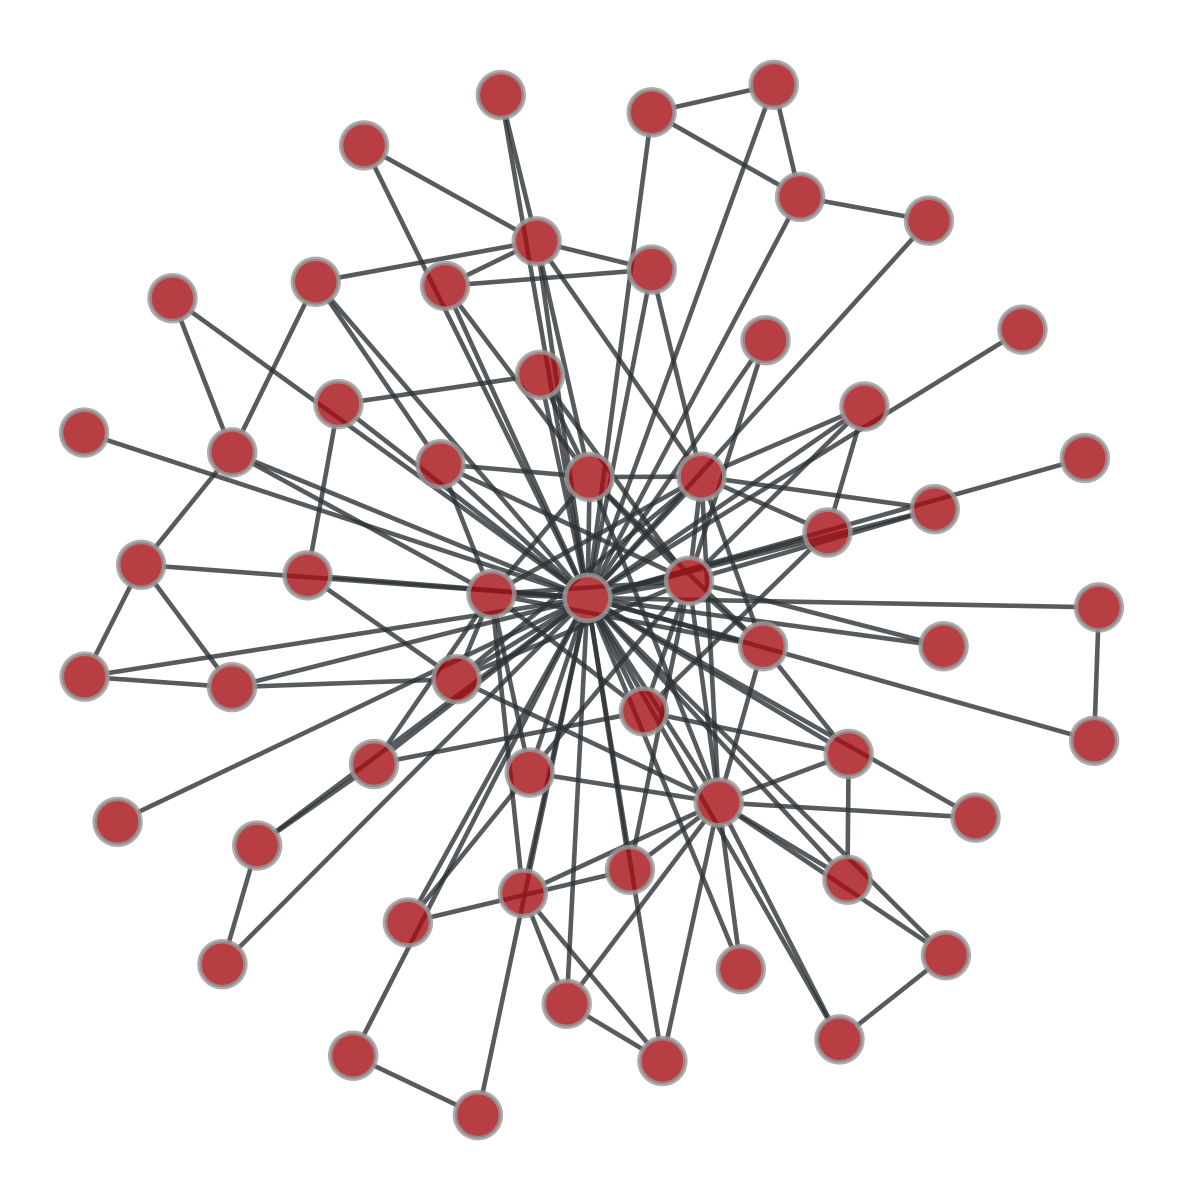

In [539]:
from graph_tool.all import Graph, graph_draw, GraphView

g = Graph(directed=False)

clusters = pl.read_parquet(df("clusters"))

colors = pl.DataFrame({
    "color_id": 
        [0,1,2,3]
    ,
    "color": [
        "grey",
        "yellow",
        "orange",
        "red"
    ]
})

prepped_pairs = (
    pl.scan_parquet(df("cluster_pairs")).select(
    pl.col("cluster_pair").list.first().alias("first"),
    pl.col("cluster_pair").list.last().alias("last"),
    pl.col("paper_ids"),
    pl.col("count"),
    pl.col("count").truediv(pl.col("count").max()).alias("weight"),
    ((pl.col("count") - 1) / pl.col("count").max() * 4).floor().cast(pl.Int64).alias("color_id")
)
    .join(colors.lazy(), on="color_id")
    .select(pl.exclude("color_id"))
).collect()

# print(clusters)
# print(clusters.to_dict())
print(prepped_pairs)
# kw_pairs_min_max = (
#     kw_pairs.lazy()
#     .select(
#         pl.col("count").alias("min").min(),
#         pl.col("count").alias("max").max(),
#     )
# ).collect()
# kw_pairs_min_max["max"][0]
g = Graph(directed=False)
# g.add_vertex(len(clusters))
g.add_edge_list(prepped_pairs.iter_rows(), eprops=[('paper_ids', 'string'), ('count', 'int'), ('weight', 'float'), ('color', 'string')])

g.vp["keywords"] = g.new_vertex_property("string", clusters["keywords"])
g.vp["label"] = g.new_vertex_property("string", clusters.get_column("keywords").list.head(1).cast(pl.List(pl.String)).list.join(" ; "))
def add_vp(key, type_, col=None):
    """ Adds a vertex property to the graph. """
    g.vp[key] = g.new_vp(type_, clusters.get_column(key if col is None else col))

add_vp("keyword_count", "int")
add_vp("paper_count", "int")
add_vp("paper_ids", "string")
graph_draw(g)

path = "clusters.graphml"
g.save(path)
# with open(path, "r") as f:
#     data = f.read()
# data = data.replace('attr.type="vector_int"', 'attr.type="int[]"')
# data = data.replace('attr.type="vector_string"', 'attr.type="string[]"')
# with open(path, "w") as f:
#     f.write(data)

### Graph from keywords

In [524]:
from graph_tool.all import Graph, graph_draw, GraphView

g = Graph(directed=False)

kw_pairs = pl.read_parquet(df("kw_pairs"))
keywords = pl.read_parquet(df("keywords"))

# kw_pairs_min_max = (
#     kw_pairs.lazy()
#     .select(
#         pl.col("count").alias("min").min(),
#         pl.col("count").alias("max").max(),
#     )
# ).collect()
# kw_pairs_min_max["max"][0]
g = Graph(directed=False)
v_text = g.add_edge_list(kw_pairs.get_column("KW_pairs"), hashed=True, hash_type="string")
vmapping = {v_text[i]: i for i in range(g.num_vertices())}

In [517]:
g.vp["names"] = v_text

In [512]:
gv = GraphView(g, vfilt=lambda i: i < 100)
graph_draw(
    gv,
    inline=False,
    vertex_text=v_text,
    vertex_text_position=0,
    vertex_text_color="black"
    # output="kw_pairs.pdf"
)
# str(g.vertex(0))

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f42b356a840, at 0x7f42f832d160>,
 <VertexPropertyMap object with value type 'bool', for Graph 0x7f42b356a840, at 0x7f431ad15d30>)

In [518]:
g.save("keywords_pairs.graphml")